In [2]:
import numpy as np
import matplotlib.pyplot as plt

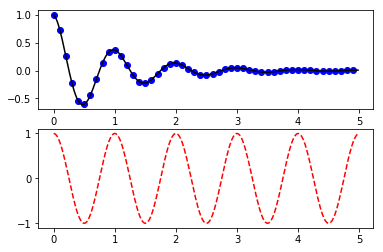

In [3]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [23]:
values = [79.8, 59.3, 57.4, 45.4, 40.9, 36.2, 27.3, 18.5, 19.9, 21.0, 17.2, 17.5, 19.4, 16.2, 14.2, 14.2, 14.3, 14.0, 16.3]
years = [1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

for year, value in zip(years, values):
    print(year, value)

1970 79.8
1975 59.3
1980 57.4
1985 45.4
1990 40.9
1995 36.2
2000 27.3
2005 18.5
2006 19.9
2007 21.0
2008 17.2
2009 17.5
2010 19.4
2011 16.2
2012 14.2
2013 14.2
2014 14.3
2015 14.0
2016 16.3


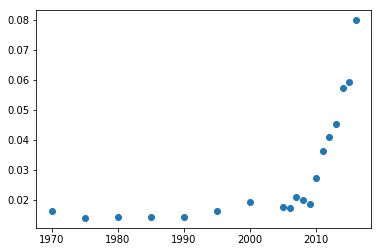

In [281]:
y = np.array(values) / 10**3
x = np.array(years[::-1])

plt.plot(x, y, 'o')
plt.show()

In [282]:
from scipy.interpolate import interp1d

f = interp1d(x, y, fill_value=(2000, 2050))
#f2 = interp1d(n_v, n_y, kind='cubic')

In [283]:
xnew = np.linspace(1970, 2016, num=50, endpoint=True)

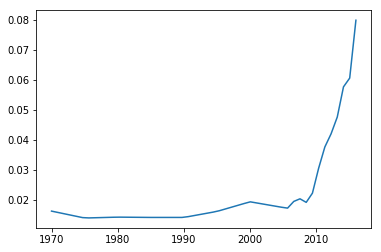

In [284]:
plt.plot(xnew, f(xnew), '-')
plt.show()

In [285]:
from scipy.optimize import least_squares, curve_fit

In [386]:
x0 = np.array([100, 2, 100, 100, 0])

In [399]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def model1(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model1(x, u) - y



res = least_squares(fun, x0, args=(x, y))

In [400]:
u_test = np.linspace(1970, 2016)
y_test = model(res.x, u_test)

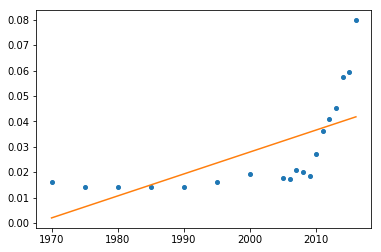

In [401]:
plt.plot(x, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.show()

In [290]:
print(model(res.x, 3000)* 10000) 

8776.07039591


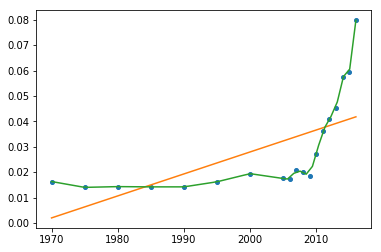

In [291]:
plt.plot(x, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.plot(xnew, f(xnew), '-')
plt.show()

In [29]:
y = """2109,4	79,8	39,1	39,2	92	115,3	119,9	154,6	209,4	307,9	520,4	839,4	1336,3	2234,3	3697,3	5899,1	9456,4	14484,6	23879,4
1957,3	59,3	39,9	32,3	69,8	90,4	100,9	122,8	191,2	300,7	472,7	806,9	1241	2044,7	3360,9	5534,6	8858,7	14192,6	24280,1
1612,6	57,4	40,7	29,8	59,8	90,9	93,3	116,4	176,1	308,2	519,9	862,3	1390,4	2124,5	3471,1	5720,6	9206,6	14839,2	24678,1
1255,5	45,4	29,1	26,2	58,6	75,4	86,6	113,3	177,3	306,1	499,6	838,6	1333,9	2185,2	3268,3	5413,5	8784,4	14033,4	24089,1
1099,1	40,9	25	20,9	56,9	83,1	82,5	117,4	190,1	314,3	535,6	841,7	1343,7	2127,6	3317	5048,4	8233,9	13007	22634,4
734,9	36,2	25	21,9	62,3	74	80,2	106,1	165,9	268,8	440,7	727,4	1113,8	1787,5	2795,2	4456	6996,1	11904,2	21208,1
414,9	27,3	17,2	19,8	50,5	68,7	67	85,1	126,1	232,7	401,7	643,5	981,9	1517,8	2402,5	3743,2	6172,3	10077,9	19582,9
347,9	18,5	12,6	18,1	41,8	61,7	63,4	82,7	116,2	187,4	360,3	572,2	919,8	1388,7	2094	3345	5636,4	9705,5	20619,2
338	19,9	14,3	12,1	38	60,4	53,5	69,3	112,1	188,1	334,3	554,5	870,2	1375,8	1987,4	3119,5	5263,6	9118,2	19147,3
327,2	21	10	14	38,9	60,7	63,2	69,1	115	181,7	301,6	536,8	881,6	1346,5	1928,8	3101,2	5121,3	8879,3	18189,5
288,2	17,2	9	14,4	39,7	54,7	61,5	73,6	101,6	184	302,6	529,1	867,5	1322,9	1906,1	2968,7	4909	8746,4	17544,3
285,8	17,5	10,7	15,4	33,5	55,2	52,9	72,8	104,6	175,4	295,4	513,3	830,1	1298,8	1947,4	2914	4952,2	8698,6	17911,3
265,1	19,4	9,8	13,2	34,9	54,9	55,7	64,5	97,1	171,2	281,2	507,8	810,6	1286,9	1909,2	2847,6	4783,8	8452,1	17342
261,5	16,2	8,4	11,9	37,5	56,5	51,9	68,1	98,3	165	268,4	486,1	797,9	1251,5	1887,7	2777,4	4649,3	8262	17067,5
262,1	14,2	9,4	12,5	35,8	45,5	51,5	70,5	97,8	159,4	264,4	452,8	771,8	1230,5	1855,9	2769,4	4568,9	8131,3	17371,9
245,9	14,2	9,5	8,1	37,4	51,2	55,7	65,7	89,7	148,8	266,3	427,7	734,8	1206,9	1875,8	2755,1	4511,8	7986,4	15499,9
242,7	14,3	9,4	8,6	35	44,6	51,2	61	85,8	143,5	254,7	405,9	691	1137,4	1771,2	2610	4261,1	7508,5	16644,6
246,5	14	8,6	10,9	28	47,8	52,6	59,9	91,7	140,6	246	402,2	670,8	1151,9	1771,7	2774,6	4287,4	7907,7	17560,1
283,9	16,3	7,3	10,4	28,1	46,8	50,2	62	89,1	135,4	242,2	382,5	672,8	1081,5	1722,1	2650	4127,1	7287,4	16468,3""".replace('\t',';').replace(',', '.').split('\n')

import numpy as np
tmp = [x.split(';') for x in y]
tmp = [[float(y) for y in x.split(';')] for x in y]

zip(*tmp)
new = list(zip(*tmp))
print(new)

import json

with open('data.json', 'w') as out:
    json.dump(new, out)

[(2109.4, 1957.3, 1612.6, 1255.5, 1099.1, 734.9, 414.9, 347.9, 338.0, 327.2, 288.2, 285.8, 265.1, 261.5, 262.1, 245.9, 242.7, 246.5, 283.9), (79.8, 59.3, 57.4, 45.4, 40.9, 36.2, 27.3, 18.5, 19.9, 21.0, 17.2, 17.5, 19.4, 16.2, 14.2, 14.2, 14.3, 14.0, 16.3), (39.1, 39.9, 40.7, 29.1, 25.0, 25.0, 17.2, 12.6, 14.3, 10.0, 9.0, 10.7, 9.8, 8.4, 9.4, 9.5, 9.4, 8.6, 7.3), (39.2, 32.3, 29.8, 26.2, 20.9, 21.9, 19.8, 18.1, 12.1, 14.0, 14.4, 15.4, 13.2, 11.9, 12.5, 8.1, 8.6, 10.9, 10.4), (92.0, 69.8, 59.8, 58.6, 56.9, 62.3, 50.5, 41.8, 38.0, 38.9, 39.7, 33.5, 34.9, 37.5, 35.8, 37.4, 35.0, 28.0, 28.1), (115.3, 90.4, 90.9, 75.4, 83.1, 74.0, 68.7, 61.7, 60.4, 60.7, 54.7, 55.2, 54.9, 56.5, 45.5, 51.2, 44.6, 47.8, 46.8), (119.9, 100.9, 93.3, 86.6, 82.5, 80.2, 67.0, 63.4, 53.5, 63.2, 61.5, 52.9, 55.7, 51.9, 51.5, 55.7, 51.2, 52.6, 50.2), (154.6, 122.8, 116.4, 113.3, 117.4, 106.1, 85.1, 82.7, 69.3, 69.1, 73.6, 72.8, 64.5, 68.1, 70.5, 65.7, 61.0, 59.9, 62.0), (209.4, 191.2, 176.1, 177.3, 190.1, 165.9, 126.1

In [32]:
y = """0	1–4	5–9	10–14	15–19	20–24	25–29	30–34	35–39	40–44	45–49	50–54	55–59	60–64	65–69	70–74	75–79	80–84	85+""".split('\t')

print(y)

['0', '1–4', '5–9', '10–14', '15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49', '50–54', '55–59', '60–64', '65–69', '70–74', '75–79', '80–84', '85+']
